In [6]:
import numpy
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam 
from keras.utils import np_utils

In [11]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [12]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [13]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [14]:
y_train[0]

5

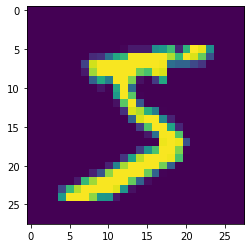

In [15]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [20]:
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32')

In [23]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test,number_of_classes)

In [24]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

model.add(Flatten())

model.add(Dense(number_of_classes,activation='softmax'))

In [25]:
model.compile(loss='categorical_crossentropy',optimizer="Adam", metrics=['accuracy'])

In [26]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 233s 124ms/step - loss: 0.2494 - accuracy: 0.9508 - val_loss: 0.0881 - val_accuracy: 0.9749
Epoch 2/5
1875/1875 [==============================] - 260s 139ms/step - loss: 0.0744 - accuracy: 0.9773 - val_loss: 0.0753 - val_accuracy: 0.9746
Epoch 3/5
1875/1875 [==============================] - 261s 139ms/step - loss: 0.0474 - accuracy: 0.9848 - val_loss: 0.0914 - val_accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 238s 127ms/step - loss: 0.0394 - accuracy: 0.9876 - val_loss: 0.0957 - val_accuracy: 0.9763
Epoch 5/5
1875/1875 [==============================] - 199s 106ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.1026 - val_accuracy: 0.9791


In [27]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.102630116045475, 0.9790999889373779]


In [28]:
prediction=model.predict(x_test[:4])
print(prediction)

[[1.7586854e-13 2.6823407e-24 9.7830119e-11 4.8781243e-11 6.9613751e-21
  4.0180417e-19 4.5379036e-25 1.0000000e+00 6.1121404e-13 3.0557033e-12]
 [1.1318991e-09 1.6833001e-14 1.0000000e+00 1.0231794e-15 1.2875592e-19
  3.0918446e-17 5.2377203e-10 8.6678230e-24 1.5153222e-12 6.3229757e-20]
 [9.3043901e-09 9.9978179e-01 2.7364287e-08 5.0720725e-12 1.9622537e-05
  2.3455220e-07 6.8224253e-11 5.0131920e-08 1.9826398e-04 3.7779860e-10]
 [1.0000000e+00 1.2143117e-19 6.3855571e-14 8.3454252e-19 2.7454170e-16
  3.5484185e-12 4.5562681e-12 5.4999603e-18 1.5008056e-15 8.1709907e-14]]


In [29]:
import numpy  as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [30]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.102630116045475, 0.9790999889373779]


In [31]:
prediction=model.predict(x_test[:4])
print(prediction)

[[1.7586854e-13 2.6823407e-24 9.7830119e-11 4.8781243e-11 6.9613751e-21
  4.0180417e-19 4.5379036e-25 1.0000000e+00 6.1121404e-13 3.0557033e-12]
 [1.1318991e-09 1.6833001e-14 1.0000000e+00 1.0231794e-15 1.2875592e-19
  3.0918446e-17 5.2377203e-10 8.6678230e-24 1.5153222e-12 6.3229757e-20]
 [9.3043901e-09 9.9978179e-01 2.7364287e-08 5.0720725e-12 1.9622537e-05
  2.3455220e-07 6.8224253e-11 5.0131920e-08 1.9826398e-04 3.7779860e-10]
 [1.0000000e+00 1.2143117e-19 6.3855571e-14 8.3454252e-19 2.7454170e-16
  3.5484185e-12 4.5562681e-12 5.4999603e-18 1.5008056e-15 8.1709907e-14]]


In [32]:
import numpy  as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [33]:
model.save('models/mnnistCNN.h5')

In [36]:
# Importing the Keras Libraries and packages
from tensorflow.keras.models import load_model
model = load_model(r'C:/Users/DELL/Hand written recognition System/models/mnistCNN.h5') from PIL import Image#used for manipulating image uploaded by the user.
import numpy as np used for numerical analysis
for index in range(4):
img Image.open('data/' + = str(index) '.png').convert("L")# convert image to monochrome +
img=img.resize((28,28))# resizing of input image
im2arr - np.array(img) #converting to image
im2arr = im2arr.reshape(1,28,28,1) #reshaping according to our requirement
# Predicting the Test set results
y_pred = model.predict(im2arr) #predicting the results
print(y_pred)


SyntaxError: ignored

In [37]:
from flask import Flask, render_template, request# Flask-It is our framework which we are going to use to run/serve our application.
#request-for accessing file which was uploaded by the user on our application.
from PIL import Image #used for manipulating image uploaded by the user.
import numpy as np #used for numerical analysis
from tensorflow.keras.models import load_model#to Load our model trained with MNIST data
import tensorflow as tf#to run our model.

In [38]:
@app.route('/') #default route def upload_file():
return render_template('main.html') #rendering html page
@app.route('/about') #Main page route def upload_file1():
return render_template('main.html') #rendering html page
@app.route('/upload') #main page route def upload_file2():
return render_template('index6.html')

SyntaxError: ignored

In [39]:
if(y_pred == 0): return render_template("0.html", showcase = str(y_pred))
elif(y_pred == 1) :
return render_template("1.html",showcase str(y_pred))
elif(y_pred == 2) :' return render_template("2.html", showcase = str(y_pred))
elif(y_pred == 3) : return render_template("3.html", showcase = str(y_pred))
elif(y_pred == 4): return render_template("4.html", showcase = str(y_pred))
elif(y_pred == 5): return render_template("5.html",showcase str(y_pred)) elif(y_pred == 6):
return render_template("6.html", showcase = str(y_pred)) elif(y_pred == 7) :
return render_template("7.html", showcase = str(y_pred))
elif(y_pred == 8):
return render_template("8.html", showcase = str(y_pred)) else :
return render_template("9.html",showcase str(y_pred)) else:
return None

IndentationError: ignored

In [40]:
(base) C:\Users\DELL>cd C:\Users\DELL\Hand_Written_Final
(base) C:\Users\DELL\Hand_Written_Final>python app.py

SyntaxError: ignored